# Quant Mentorship Final Project

Import statements and loading the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load health data
data = pd.read_csv('health_data.csv')

# Print data
data.head()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5.0,55.403270,7.300359,0.0,2.834707,70.542122
1,38.340828,29.623168,6.0,41.838357,7.012419,1.0,7.199517,57.244637
2,47.772262,25.298152,5.0,76.904948,6.028641,1.0,4.097944,96.333722
3,58.276358,21.765316,2.0,49.756767,5.802714,1.0,3.649377,61.321783
4,37.190160,28.491117,2.0,44.218737,7.912548,0.0,2.839795,67.175894


# Question 1: Does smoking status have an effect on sleep hours?

##### We are trying to analyze if smoking affects sleep using a box plot. We want to compare the summary statistics of sleep hours of smokers and sleep hours of non-smokers. 

##### Summary statistics of sleep hours of smokers vs. non-smokers

In [2]:
# Non smoking data for box plot
non_smoker_data = data[data['Smoking_Status'] == 0]['Sleep_Hours']


# Smoking data for box plot
smoker_data = data[data['Smoking_Status'] == 1]['Sleep_Hours']

# Sleep summary statistics for smokers
print("Sleep summary statistics for smokers: ")
print(smoker_data.describe())

print()

# Sleep summary statistics for non-smokers
print("Sleep summary statistics for non-smokers: ")
print(non_smoker_data.describe())


Sleep summary statistics for smokers: 
count    499.000000
mean       6.939269
std        1.530926
min        2.431107
25%        5.859735
50%        6.934499
75%        8.079457
max       11.381129
Name: Sleep_Hours, dtype: float64

Sleep summary statistics for non-smokers: 
count    499.000000
mean       7.011574
std        1.504986
min        2.662251
25%        5.948135
50%        7.081527
75%        7.974648
max       11.638962
Name: Sleep_Hours, dtype: float64


##### Create a box plot to visualize the summary statistics of each group.

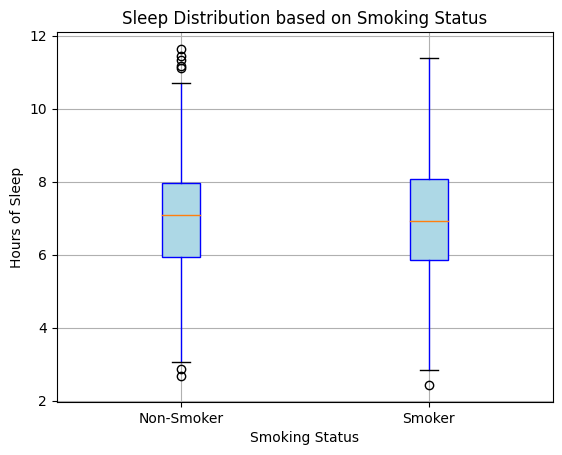

In [3]:
# Make the box plot
plt.boxplot([non_smoker_data, smoker_data], labels=['Non-Smoker', 'Smoker'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'))


# Labels for visualization
plt.title('Sleep Distribution based on Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Hours of Sleep')
plt.grid(True, linestyle='-')

##### Analysis: This boxplot compares the distribution of sleep hours between non-smokers and smokers. Non-smokers generally have a higher median sleep duration compared to smokers, suggesting better sleep patterns. In addition, the range and interquartile range of smokers is higher and more variable. This could indicate that smoking could have a negative effect on sleep consistency and quality.


# Question 2: Alcohol Consumption vs Diet Quality: Which one has a larger impact on your health?

##### We are trying to analyze if alcohol consumption or diet quality has a larger impact on health score. To compare these, we create a scatter plot and compare the correlation coefficient of alcohol consumption vs health score and diet quality vs health score. Whichever group has a higher absolute value of correlation coefficient shows a stronger impact to one's health score.

##### Summary statisctics of alcohol consumption, diet quality, and health score

In [4]:
# Data for diet quality
diet_data = data['Diet_Quality']

# Data for alcohol consumption
alcohol_data = data['Alcohol_Consumption']

# Data for health score
score_data = data['Health_Score']


# Summary statistics for diet quality
print("Summary statistics for diet quality: ")
print(diet_data.describe())

print()

# Summary statistics for alcohol consumption
print("Summary statistics for alcohol consumption: ")
print(alcohol_data.describe())

print()

# Summary statistics for health score
print("Summary statistics for health score: ")
print(score_data.describe())


Summary statistics for diet quality: 
count    999.000000
mean      69.932722
std       14.965847
min       19.907497
25%       59.931753
50%       69.967503
75%       80.523286
max      110.265186
Name: Diet_Quality, dtype: float64

Summary statistics for alcohol consumption: 
count    999.000000
mean       3.080413
std        2.085350
min       -3.592506
25%        1.642628
50%        3.070840
75%        4.494810
max       11.105100
Name: Alcohol_Consumption, dtype: float64

Summary statistics for health score: 
count    998.000000
mean      85.503585
std       13.636810
min       29.106017
25%       76.483885
50%       87.543500
75%       99.768189
max      100.000000
Name: Health_Score, dtype: float64


##### Scatterplot visualization for Diet Quality vs Alcohol Consumption on health score.

Text(0.5, 0, 'Alcohol Consumption')

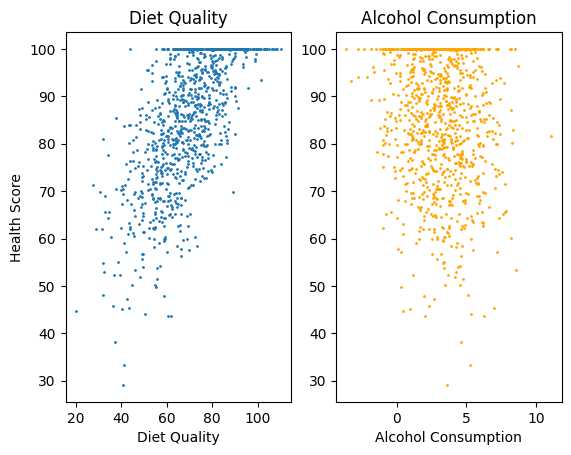

In [5]:
# Create the scatter plot for diet data and health
plt.subplot(1,2,1)
plt.scatter(diet_data, score_data, s=1)
plt.title("Diet Quality")
plt.xlabel("Diet Quality")
plt.ylabel("Health Score")


# Scatter plot with alcohol data and health score
plt.subplot(1,2,2)
plt.scatter(alcohol_data, score_data, s=1, c='orange')
plt.title("Alcohol Consumption")
plt.xlabel("Alcohol Consumption")


##### Calculating the correlation coefficient of both diet quality vs health score and alcohol consumption vs health score

In [6]:
# Find the correlation coefficient/r value for both groups
r_diet = diet_data.corr(score_data)
r_alcohol = alcohol_data.corr(score_data)

# Round each number
r_diet = round(r_diet, 2)
r_alcohol = round(r_alcohol, 2)

# Print the correlation coefficients
print("Correlation between Diet Quality and Health Score: " + str(r_diet))
print("Correlation between Alcohol Consumption and Health Score: " + str(r_alcohol))

Correlation between Diet Quality and Health Score: 0.68
Correlation between Alcohol Consumption and Health Score: -0.14


##### Analysis: The correlation coefficient of 0.68 for diet quality and health score indicates a moderatly strong positive correlation between diet quality and health score. The correlation coefficient of -0.14 for alcohol consumption and health score indicates a weak negative correlation between alcohol consumption and health score. The closer the r-value is to 1 or -1, depending on a positive or negative r-value, the stronger the correlation between two variables. This indicates diet quality has a stronger correlation than alcohol consumption on health score because 0.68 is closer to 1 than -0.14 is to -1. Therefore, diet quality has a larger impact on health score than alcohol consumption.

# Question 3: How does smoking status effect health scores across various age groups?

##### We want to analyze both age and smoking's impact on someone's health. To do this, we create a grouped bar graph where we can compare smoking vs non-smoking at three different age groups (Young, Middle-Aged, Old). When analyzing the graph, we want to check if there is a significant rise or decline between age groups of either smokers or non-smokers.

##### Creating age groups from the age data and smoking status.

In [7]:
# Data for ages
age_data = data['Age']


# Make groups for each age group
data['Age_Category'] = pd.cut(
    age_data,
    bins=[0, 30, 60, 100],
    labels=['Young', 'Middle-Aged', 'Old']
)


# Group data with both Age Category and Smoking status. Use mean of each group for average health score
group_data = data.groupby(['Age_Category', 'Smoking_Status'])['Health_Score'].mean().reset_index()


# Each group data for the bar graph
group_age = group_data['Age_Category'].unique()
group_smoking_status = group_data['Smoking_Status'].unique()

/var/folders/hv/2vlnl85n369fmvwhjtsktpsh0000gn/T/ipykernel_1499/2904793401.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = data.groupby(['Age_Category', 'Smoking_Status'])['Health_Score'].mean().reset_index()


##### Creating the grouped bar graph visual.

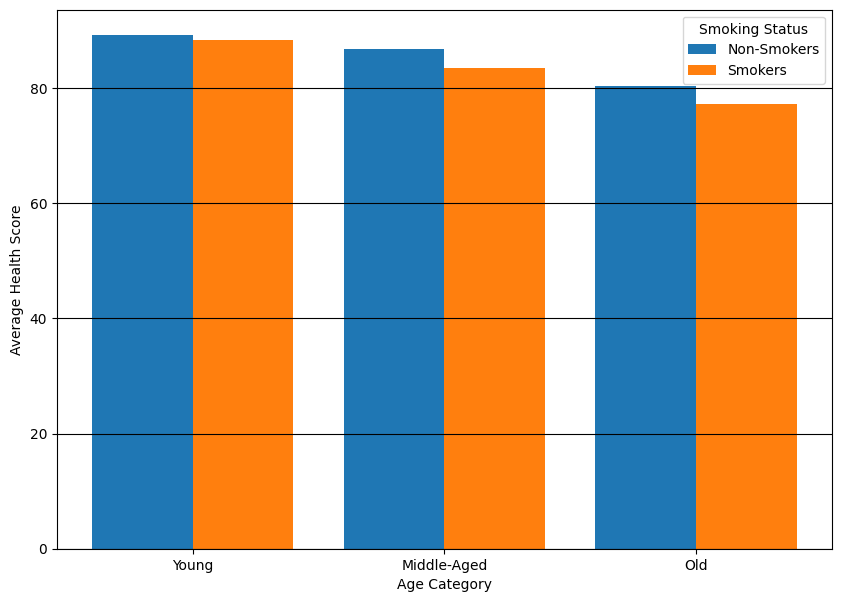

In [8]:
# Dimensions for graph
plt.figure(figsize=(10, 7))


# Create a grouped bar plot for smoking status and age to health scores
for i, smoking_status in enumerate(group_smoking_status):
    scores = group_data[group_data['Smoking_Status'] == smoking_status]['Health_Score']

    plt.bar(
        [position + i * .4 for position in range(3)], 
        scores, 
        width=0.4, 
        label=smoking_status
    )

plt.xticks([pos + .2 for pos in range(3)], group_age)

# Add labels to plot
plt.legend(labels=['Non-Smokers', 'Smokers'], title = 'Smoking Status')
plt.xlabel('Age Category')
plt.ylabel('Average Health Score')
plt.grid(axis='y', color='black', linestyle='-')


##### Analysis: For each age category, the average health score declines, with younger people having higher health scores than the elderly. Additionally, smoking has an impact as well. Smokers in each category have a lower average health score than non-smokers in the same age group. As age increases, the gap between smokers and non-smokers widens, suggesting that age and smoking cumulatively impact health scores.